## Шаг 1: Установка DVC 

[link to the docs](https://dvc.org/doc/install)

**! DVC не заменяет Git**. DVC можно рассматривать как тул, который работает *поверх* гита. Убедитесь, что у вас уже стоит git 👀<br>
например,  командой ```$ git version```
*(и кликните [сюда](https://git-scm.com/downloads), если гита еще нет)*

In [76]:
! git version

git version 2.23.0


Установочные гайды DVC по ссылкам:
- [для macOS](https://dvc.org/doc/install/macos)
- [для Windows](https://dvc.org/doc/install/windows)
- [для Linux](https://dvc.org/doc/install/linux)

Проверить, что все установилось, можно командой ```$ dvc version```

In [77]:
! dvc version

DVC version: 2.56.0 (osxpkg)
----------------------------
Platform: Python 3.10.11 on macOS-12.6.3-x86_64-i386-64bit
Subprojects:
	
Supports:
	azure (adlfs = 2023.4.0, knack = 0.10.1, azure-identity = 1.12.0),
	gdrive (pydrive2 = 1.15.3),
	gs (gcsfs = 2023.5.0),
	hdfs (fsspec = 2023.5.0, pyarrow = 12.0.0),
	http (aiohttp = 3.8.4, aiohttp-retry = 2.8.3),
	https (aiohttp = 3.8.4, aiohttp-retry = 2.8.3),
	oss (ossfs = 2021.8.0),
	s3 (s3fs = 2023.5.0, boto3 = 1.26.76),
	ssh (sshfs = 2023.4.1),
	webdav (webdav4 = 0.9.8),
	webdavs (webdav4 = 0.9.8),
	webhdfs (fsspec = 2023.5.0)
Config:
	Global: /Users/macbook/Library/Application Support/dvc
	System: /Library/Application Support/dvc
Cache types: <https://error.dvc.org/no-dvc-cache>
Caches: local
Remotes: None
Workspace directory: apfs on /dev/disk1s6s1
Repo: dvc, git
Repo.site_cache_dir: /Library/Caches/dvc/repo/3e2ce6d1b07456a70d725da1832e1929


## Шаг 2: Создадим репозиторий

Сначала я создала папку (например,  командой ```$ mkdir```) DVC в которой хочу работать, и переместилась в нее (например,  командой ``` $cd DVC```)

Затем я запустила две команды:

```$ git init``` и затем ```$ dvc init```

Теперь достанем датасет:  используем команду ```$ dvc get```,  она превратит репозиторий в "data registry". ```$ dvc get``` может достать любой файл из DVC-tracked репозитория

In [ ]:
! dvc get https://github.com/iterative/dataset-registry \
          get-started/data.xml -o data/data.xml 

Теперь используем команду```$ dvc add``` чтобы начать трекать этот файл в DVC

Добавим датасет IMDB Movies, который лежит в нашем репозитории

### А  как добавить локальные файлы?

```$ cp IMDB-Movie-Data.csv ./DVC```

```$ dvc add IMDB-Movie-Data.csv ```

Теперь, исполним несколько гитовских команд, чтобы добавить изменения и в Git:

```
$ git add .
$ git commit -m "Add raw data" 
```

давайте с последним датасетом и поработаем

## Шаг 3 : Теперь данные можно хранить, версионировать и тд

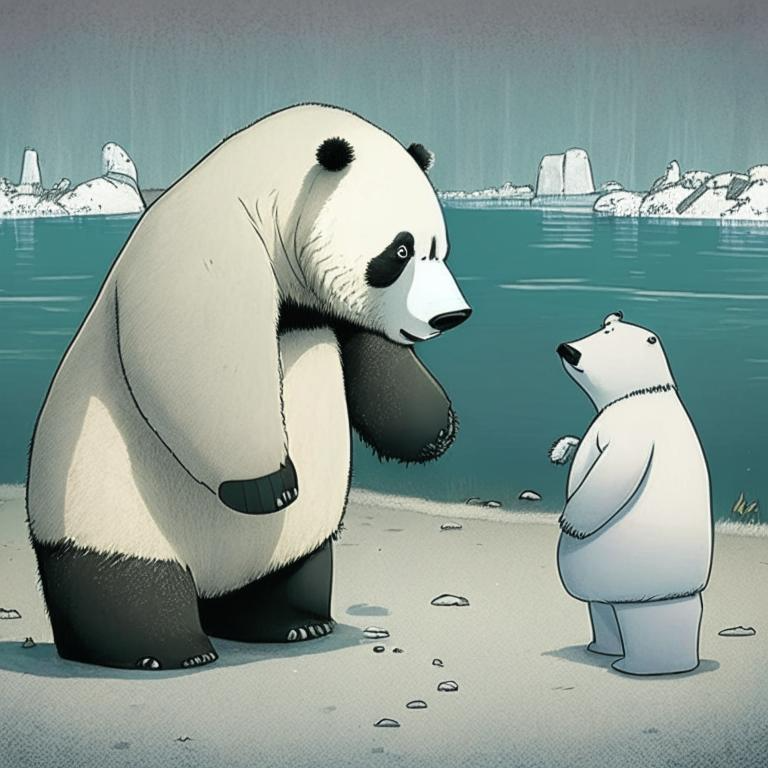


In [39]:
! pip3 install polars

In [78]:
import pandas as pd
import polars as pl

### reading a df

In [79]:
df_pl = pl.read_csv('IMDB-Movie-Data.csv') # polars

In [80]:
df_pd = pd.read_csv('IMDB-Movie-Data.csv') # pandas

In [82]:
df_pl.head(2) # polars

Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
i64,str,str,str,str,str,i64,i64,f64,i64,f64,i64
1,"""Guardians of t…","""Action,Adventu…","""A group of int…","""James Gunn""","""Chris Pratt, V…",2014,121,8.1,757074,333.13,76
2,"""Prometheus""","""Adventure,Myst…","""Following clue…","""Ridley Scott""","""Noomi Rapace, …",2012,124,7.0,485820,126.46,65


In [81]:
df_pd.head(2) #pandas

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


### Getting Info 

In [49]:
%%timeit
# View the first few rows of the DataFrame
df_pl.head()

7.29 µs ± 1.84 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [50]:
%%timeit
df_pd.head()

43.4 µs ± 8.57 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [86]:
%%timeit
df_pl.describe()
# Get basic information about the DataFrame

3.35 ms ± 1.35 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [85]:
df_pd.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [53]:
%%timeit
df_pd.describe()

45.1 ms ± 16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [57]:
%%timeit
df_pl.columns
# View the column names

4.15 µs ± 2.16 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [59]:
%%timeit
df_pd.columns

The slowest run took 6.41 times longer than the fastest. This could mean that an intermediate result is being cached.
604 ns ± 454 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [90]:
df_pl.columns

'Actors'

In [89]:
df_pd.columns

'Actors'

In [62]:
%%timeit
df_pl.shape
# Get the number of rows and columns

815 ns ± 273 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [92]:
df_pd.shape

(1000, 12)

In [63]:
%%timeit
df_pd.shape

1.75 µs ± 56.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [72]:
df_pd.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


А что еще попробуем?

### Selecting cols

In [93]:
# single col
df_pl["Title"]

Title
str
"""Guardians of t…"
"""Prometheus"""
"""Split"""
"""Sing"""
"""Suicide Squad"""
"""The Great Wall…"
"""La La Land"""
"""Mindhorn"""
"""The Lost City …"


In [96]:
df_pd.Title
# df_pd["Title"]

AttributeError: 'DataFrame' object has no attribute 'Title'

In [99]:
df_pl.select(pl.col("Title"))

Title
str
"""Guardians of t…"
"""Prometheus"""
"""Split"""
"""Sing"""
"""Suicide Squad"""
"""The Great Wall…"
"""La La Land"""
"""Mindhorn"""
"""The Lost City …"


In [35]:
# Select multiple columns by name
df_pl[['Title', 'Genre']]

Title,Genre
str,str
"""Guardians of t…","""Action,Adventu…"
"""Prometheus""","""Adventure,Myst…"
"""Split""","""Horror,Thrille…"
"""Sing""","""Animation,Come…"
"""Suicide Squad""","""Action,Adventu…"
"""The Great Wall…","""Action,Adventu…"
"""La La Land""","""Comedy,Drama,M…"
"""Mindhorn""","""Comedy"""
"""The Lost City …","""Action,Adventu…"


In [70]:
# Select columns by index position
df_pl[:,1:3]

Title,Genre
str,str
"""Guardians of t…","""Action,Adventu…"
"""Prometheus""","""Adventure,Myst…"
"""Split""","""Horror,Thrille…"
"""Sing""","""Animation,Come…"
"""Suicide Squad""","""Action,Adventu…"
"""The Great Wall…","""Action,Adventu…"
"""La La Land""","""Comedy,Drama,M…"
"""Mindhorn""","""Comedy"""
"""The Lost City …","""Action,Adventu…"


In [73]:
%%timeit
df_pl.select(pl.col("Rating").apply(lambda s: s*100))
# apply - polars

791 µs ± 78.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [74]:
%%timeit
df_pd.Rating.apply(lambda x: x*100)
#  apply - pandas

1.97 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


### filtering

In [ ]:
# Filter rows based on a condition
df_pl = df_pl.filter(pl.col('column_name') > 5)

# Filter rows using multiple conditions
df_pl = df_pl.filter((pl.col('column1') > 5) & (pl.col('column2') == 'value'))

# Filter rows using an OR condition
df_pl = df_pl.filter((pl.col('column1') > 5) | (pl.col('column2') == 'value'))


In [ ]:
# pandas

###  adding/removing

In [104]:
# # Add a new column to the DataFrame
# df = df.with_column(pl.col('new_column_name'), [1, 2, 3])

df_pd["Title_uppercase"]=df_pd.Title.apply(lambda x: x.upper())

# Remove a column from the DataFrame
# df_pl.drop('Title')

In [105]:
df_pd["Title_uppercase"]

0      GUARDIANS OF THE GALAXY
1                   PROMETHEUS
2                        SPLIT
3                         SING
4                SUICIDE SQUAD
                ...           
995       SECRET IN THEIR EYES
996            HOSTEL: PART II
997     STEP UP 2: THE STREETS
998               SEARCH PARTY
999                 NINE LIVES
Name: Title_uppercase, Length: 1000, dtype: object

In [103]:
df_pl

Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
i64,str,str,str,str,str,i64,i64,f64,i64,f64,i64
1,"""Guardians of t…","""Action,Adventu…","""A group of int…","""James Gunn""","""Chris Pratt, V…",2014,121,8.1,757074,333.13,76
2,"""Prometheus""","""Adventure,Myst…","""Following clue…","""Ridley Scott""","""Noomi Rapace, …",2012,124,7.0,485820,126.46,65
3,"""Split""","""Horror,Thrille…","""Three girls ar…","""M. Night Shyam…","""James McAvoy, …",2016,117,7.3,157606,138.12,62
4,"""Sing""","""Animation,Come…","""In a city of h…","""Christophe Lou…","""Matthew McCona…",2016,108,7.2,60545,270.32,59
5,"""Suicide Squad""","""Action,Adventu…","""A secret gover…","""David Ayer""","""Will Smith, Ja…",2016,123,6.2,393727,325.02,40
6,"""The Great Wall…","""Action,Adventu…","""European merce…","""Yimou Zhang""","""Matt Damon, Ti…",2016,103,6.1,56036,45.13,42
7,"""La La Land""","""Comedy,Drama,M…","""A jazz pianist…","""Damien Chazell…","""Ryan Gosling, …",2016,128,8.3,258682,151.06,93
8,"""Mindhorn""","""Comedy""","""A has-been act…","""Sean Foley""","""Essie Davis, A…",2016,89,6.4,2490,null,71
9,"""The Lost City …","""Action,Adventu…","""A true-life dr…","""James Gray""","""Charlie Hunnam…",2016,141,7.1,7188,8.01,78


In [101]:
# pandas
df_pd.drop('Title', axis=1, inplace=True)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...
995,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


### aggregations

In [ ]:
# Perform aggregations on a column
df.select(pl.sum('column_name'))
df.select(pl.min('column_name'))
df.select(pl.max('column_name'))
df.select(pl.mean('column_name'))
df.select(pl.count('column_name'))

In [ ]:
# pandas